## Principles and Applications of Data Science (Spring 2020)
## Homework 3
## Due: June 24, 2020

### Name:
### Student ID Number:

### Homework Description
This assignment is to practice how to generate a linear regression from a numeric dataset.We provide the weather data ﬁle (`Weather_2009_2016.csv`) for practice. In the dataset, there are twelve attributes; however, we only interest the eleven attributes for exploring the linear regression. These attributes are 
<font color=green>
1. Temperature (degC) 
2. Pressure (mbar)     
3. Tdew (degC)        
4. rh (%)             
5. VPdef (mbar)       
6. sh (g/kg)          
7. H2OC (mmol/mol)    
8. rho (g/m^3)       
9. wv (m/s)          
10. max. wv (m/s)      
11. wd (deg)            
</font>

The last ten columns are independent variables and the first one is the dependent variable. Assume the linear regression can be denoted as
$$ \textbf{y}  =  c + a_1 \textbf{x}_1  + \dots + a_{10} \textbf{x}_{10} $$
$y$ is the dependent variable, $x_i$'s are independent variables, $c$ is the constant and $a_i$ are the coeﬃcients of the linear regression. Please show the coeﬃcients of the linear regression in order (i.e., $c, a_1, a_2,..., a_{10}$) with the following approaches:

1. Calculate the linear regression from the raw data directly. (You can choose one of the approaches in class for implementation; of course, you must make sure that you won't get a singular matrix if you use the matrix approach.)
2. Generate a *heatmap* for the diagonal correlation matrix with attributes and show your observation.
3. Explore multiple variables with *scatter plot*. The scatter plot of Pandas is a grid of plots of multiple variables one against the other, showing the relationship of each variable to the others. Please state what you observe.
4. Improve the linear regression from question 1 and get a new linear regression if the coeﬃcients  are meaningless.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})


In [17]:
# Using pandas read raw data
column_name = ['Date Time', 'Temperature (degC)','Pressure (mbar)', 'Tdew (degC)', 'rh (%)',
               'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']
weatherData = pd.read_csv("Weather_2009_2016.csv", header=0, names=column_name) # 12 columns
# print some infomation
print('Keys:', weatherData.keys())
weatherData.info()
weatherData.head()

Keys: Index(['Date Time', 'Temperature (degC)', 'Pressure (mbar)', 'Tdew (degC)',
       'rh (%)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date Time           420551 non-null  object 
 1   Temperature (degC)  420551 non-null  float64
 2   Pressure (mbar)     420551 non-null  float64
 3   Tdew (degC)         420551 non-null  float64
 4   rh (%)              420551 non-null  float64
 5   VPdef (mbar)        420551 non-null  float64
 6   sh (g/kg)           420551 non-null  float64
 7   H2OC (mmol/mol)     420551 non-null  float64
 8   rho (g/m**3)        420551 non-null  float64
 9   wv (m/s)            420551 non-null  float64
 10  max. wv (m/s)       420551 non-null  float64
 11  

,Date Time,Temperature (degC),Pressure (mbar),Tdew (degC),rh (%),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,-8.02,996.52,-8.90,93.3,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,-8.41,996.57,-9.28,93.4,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,-8.51,996.53,-9.31,93.9,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,-8.31,996.51,-9.07,94.2,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,-8.27,996.51,-9.04,94.1,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [18]:
#Preparing Training and Testing dataset
# get X and Y for model
X = np.array([weatherData['Pressure (mbar)'].values, weatherData['Tdew (degC)'].values, weatherData['rh (%)'].values,
             weatherData['VPdef (mbar)'].values, weatherData['sh (g/kg)'].values, weatherData['H2OC (mmol/mol)'].values,
             weatherData['rho (g/m**3)'].values, weatherData['wv (m/s)'].values,weatherData['max. wv (m/s)'].values,
             weatherData['wd (deg)'].values]).T    
y = np.array(weatherData['Temperature (degC)'].values)

# 50% for training and 50% for testing
train_size = int(X.shape[0]/2) # 210275
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]  
print('Training and testing set sizes:', X_train.shape, X_test.shape)

Training and testing set sizes: (210275, 10) (210276, 10)


In [19]:
# Using LinearRegression in sklearn
model_weather = linear_model.LinearRegression()
model_weather.fit(X_train, y_train) 
print('Coeff and intercept:', model_weather.coef_, model_weather.intercept_)
# Best possible score is 1.0, lower values are worse.
print('Training Score:', model_weather.score(X_train, y_train)) 
print('Testing Score:', model_weather.score(X_test, y_test)) 
print('Training MSE:', np.mean((model_weather.predict(X_train) - y_train)**2))
print('Testing MSE:', np.mean((model_weather.predict(X_test) - y_test)**2))

Coeff and intercept: [ 2.49288586e-01 -1.67872282e-02 -9.91277418e-03  1.20376399e-01
 -7.64952719e+00  4.92314047e+00 -1.97517826e-01  3.28669450e-03
 -1.05421568e-03  2.50731323e-05] 2.0012411906259597
Training Score: 0.9998887016659342
Testing Score: 0.9992073892031162
Training MSE: 0.00856026356628365
Testing MSE: 0.05089558010420859


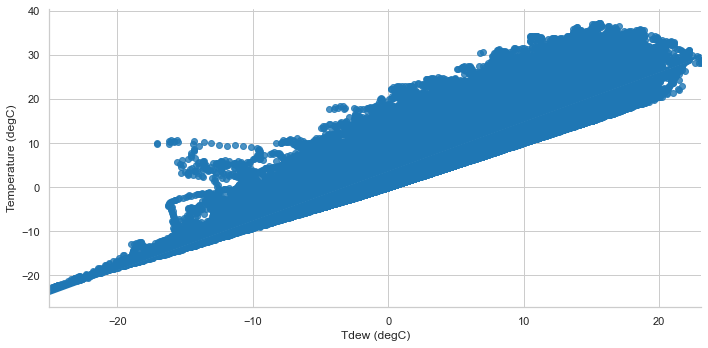

In [20]:
# Visualization of the relations between Tdew (degC) and Temperature (degC)
sns.lmplot("Tdew (degC)", "Temperature (degC)", weatherData, height=5, aspect = 2)

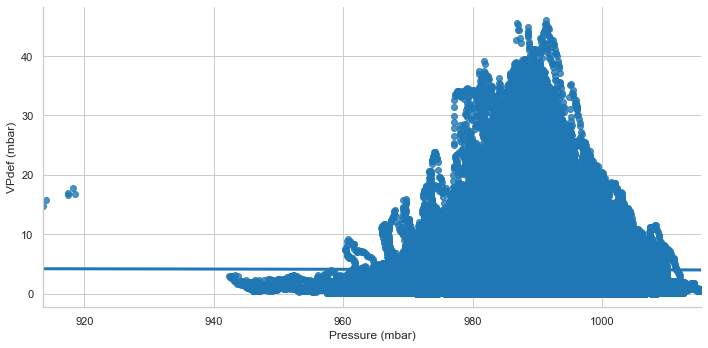

In [21]:
# Visualization of the relations between Pressure (mbar) and VPdef (mbar)
sns.lmplot("Pressure (mbar)", "VPdef (mbar)", weatherData, height=5, aspect = 2)

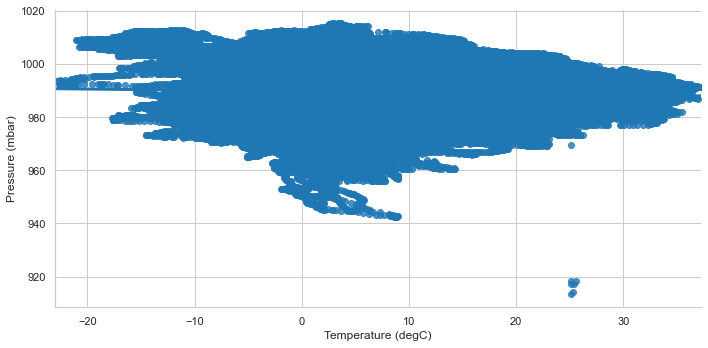

In [22]:
# Visualization of the relations between Temperature (degC) and Pressure (mbar) 
sns.lmplot("Temperature (degC)", "Pressure (mbar)", weatherData, height=5, aspect = 2)

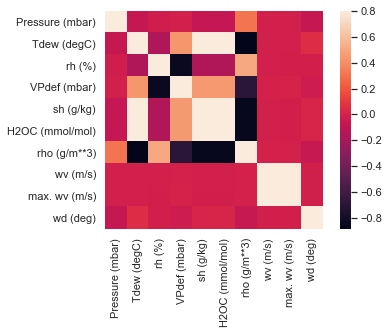

In [23]:
column_name2 = ['Pressure (mbar)', 'Tdew (degC)', 'rh (%)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
                'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'] # 10 columns
df_Weather = pd.DataFrame(X, columns = column_name2)
corrmat = df_Weather.corr()
sns.heatmap(corrmat, vmax = .8, square = True)

D:\ProgramData\Anaconda3\envs\DS\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


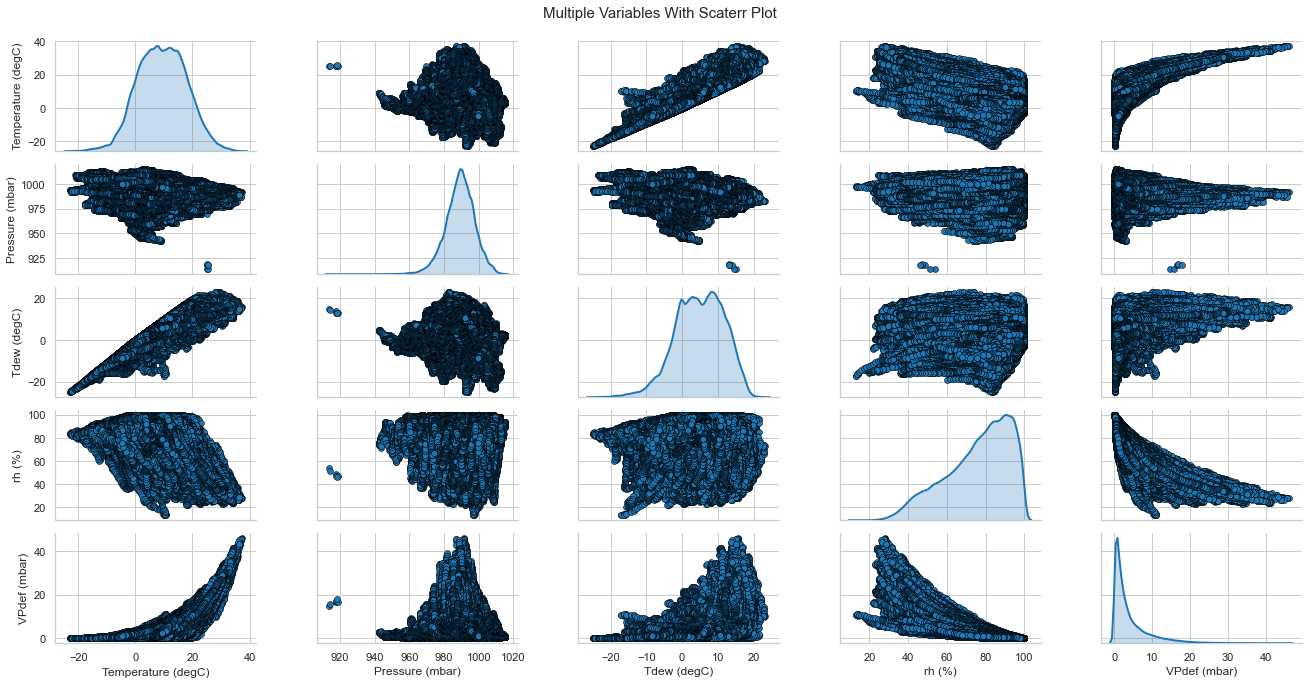

In [24]:
cols=['Temperature (degC)','Pressure (mbar)','Tdew (degC)','rh (%)','VPdef (mbar)']
Swathi = sns.pairplot(weatherData[cols], size=1.9, aspect=1.9,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = Swathi.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Multiple Variables With Scaterr Plot', fontsize=15)